Reference of the examples can be found in the book `Hands-on machine learning with Scikit-Learn, Keras and TensorFlow` by Aurelien Geron.

# Import Necessary Libraries

In [9]:
import sklearn
import numpy as np
import pandas as pd


In [10]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [11]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Enable high-resolution inline plots
set_matplotlib_formats('retina')  # Options: 'png', 'retina', 'pdf', 'svg'

# Optionally, set a higher DPI for figures
plt.rcParams['figure.dpi'] = 150  # A
plt.rcParams['figure.figsize'] = (4, 3)  # Set
plt.rcParams['text.usetex'] = False

<ipython-input-11-f2912cabb033>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')  # Options: 'png', 'retina', 'pdf', 'svg'


# Synthesize data

In [12]:
# Let's generate some dummy data to work on ...

X_1 = 2 * np.random.rand(100, 1) # so, we know that the min and max values of X are 0, 2
y = 4 + 3 * X_1 + np.random.randn(100, 1)

# Include constant

In [13]:
# Add an additional dimension to X.
# with a value 1 to account for the
# intercept

ones = np.ones((X_1.shape[0], 1))
X = np.hstack([ones, X_1])

In [27]:
X_1.shape, X.shape, y.shape

((100, 1), (100, 2), (100, 1))

## Plot

Text(0, 0.5, '$y$')

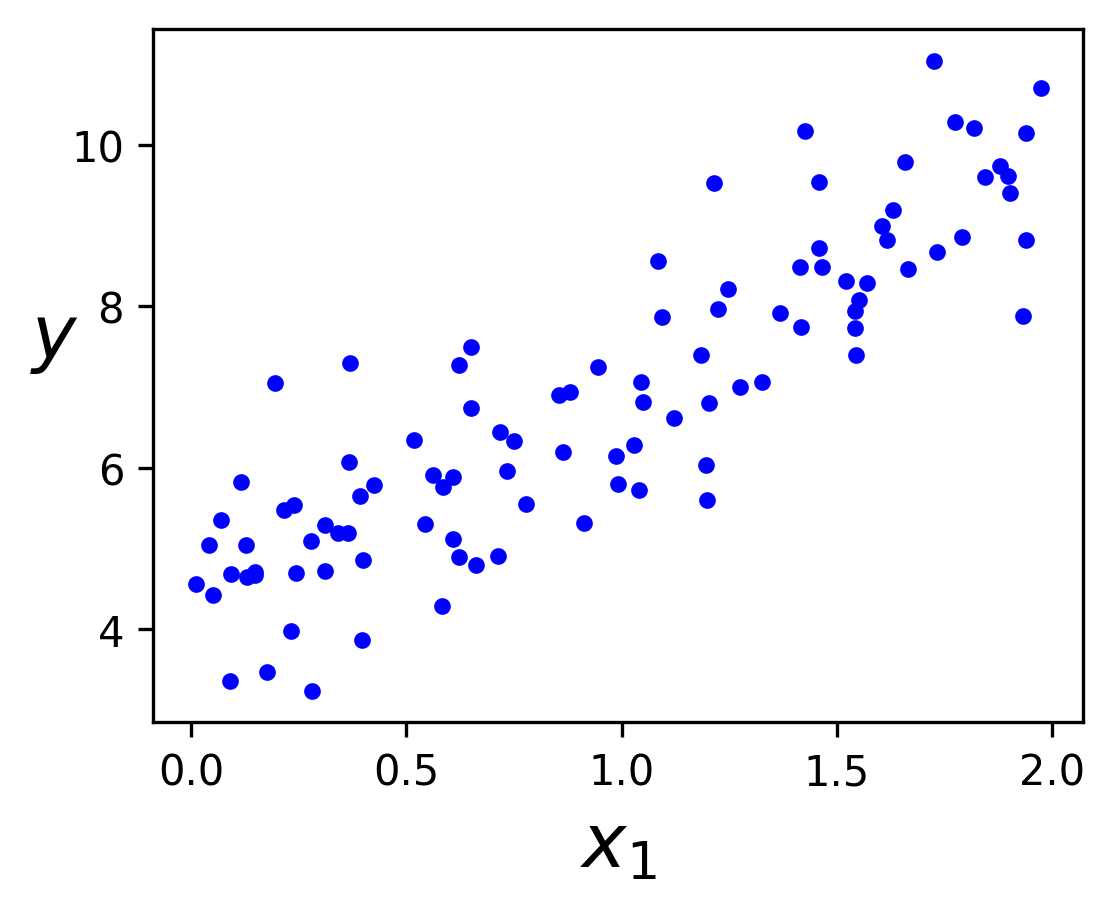

In [15]:
plt.plot(X_1, y, "b.")
plt.xlabel(r"$x_1$", rotation=0, fontsize=18) # latex syntax works in plt!
plt.ylabel("$y$", rotation=0, fontsize=18)

# Linear Regression

## Closed Form Solution
Machine Learning Time!
The very first machine learning algorithm of the course

Use the closed form solution to find the parameters of the fit

$\theta = (X^TX)^{-1}X y$

Hint: Use numpy

## Batch Gradient Descent (BGD)

1. Make predictions with current coefficients
2. Compute gradient of loss over all training samples
3. Update coefficients
4. Go back to step 1. Repeat 1-3 for a number of steps

In [16]:
eta = 0.1  # learning rate
n_iterations = 100
m = X.shape[0] # number of samples

# random initialization of weight and bias
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    y_hat = X @ theta # prediction
    gradient = 2.0/m * (X.T) @ (y_hat - y) # calculate gradients
    theta -= eta * gradient # update coefficients

print(theta)

[[4.16104533]
 [2.81783733]]


In [17]:
# Prediction of a datapoint outside training data

X_test = np.array([[1, 2], [1.5,0.54]])
y_test_hat = X_test @ theta
print(y_test_hat)

[[9.79671999]
 [7.76320015]]


### Tasks
1. Print the RMSE every 10 steps
2. Package the whole task of finding coefficients into a funciton
3. If you were to create a class, how would you do it. Try creating a class and take the above example as an instantiation of the class, i.e., as an object
4. What is the effect of changing eta?
5. Create a test dataset in a manner similar to training set synthesis and calcuate the following metrics:
  * $R^2$
  * $RMSE$
  * $MAPE$
  * $MAE$
6. Repeat 5. for all LR implementations in the current notebook.

In [26]:
# insert cells below

### Evolution of coefficients

In [18]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    theta = theta.copy()
    m = len(X)
    plt.scatter(X_1, y, s=10, alpha=0.7)
    n_iterations = 1_00
    for iteration in range(n_iterations):
        # the plot is shown only for the first 10 iterations
        if ((iteration < 10) or (iteration == n_iterations-1)):
            if (iteration == 0):
              color, linestyle, alpha = 'red', '--', 1.0
            elif (iteration < n_iterations-1):
              color, linestyle = 'green', '-'
              alpha = ((iteration+1) / 10.0)
            else:
              color, linestyle = 'orange', '-'
              alpha = 1.0

            # dashed line when iteration = 0, blue otherwise
            plt.axline(xy1=(0.0, theta[0,0]),
                       slope=theta[1,0],
                       color=color,
                       linestyle=linestyle,
                       alpha=alpha) # plot based on intercept and slope

        y_hat = X @ theta # prediction
        gradient = 2.0/m * (X.T) @ (y_hat - y) # calculate gradients
        theta -= eta * gradient # update coefficients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$X_1$")
    plt.ylabel("$y$")
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta))

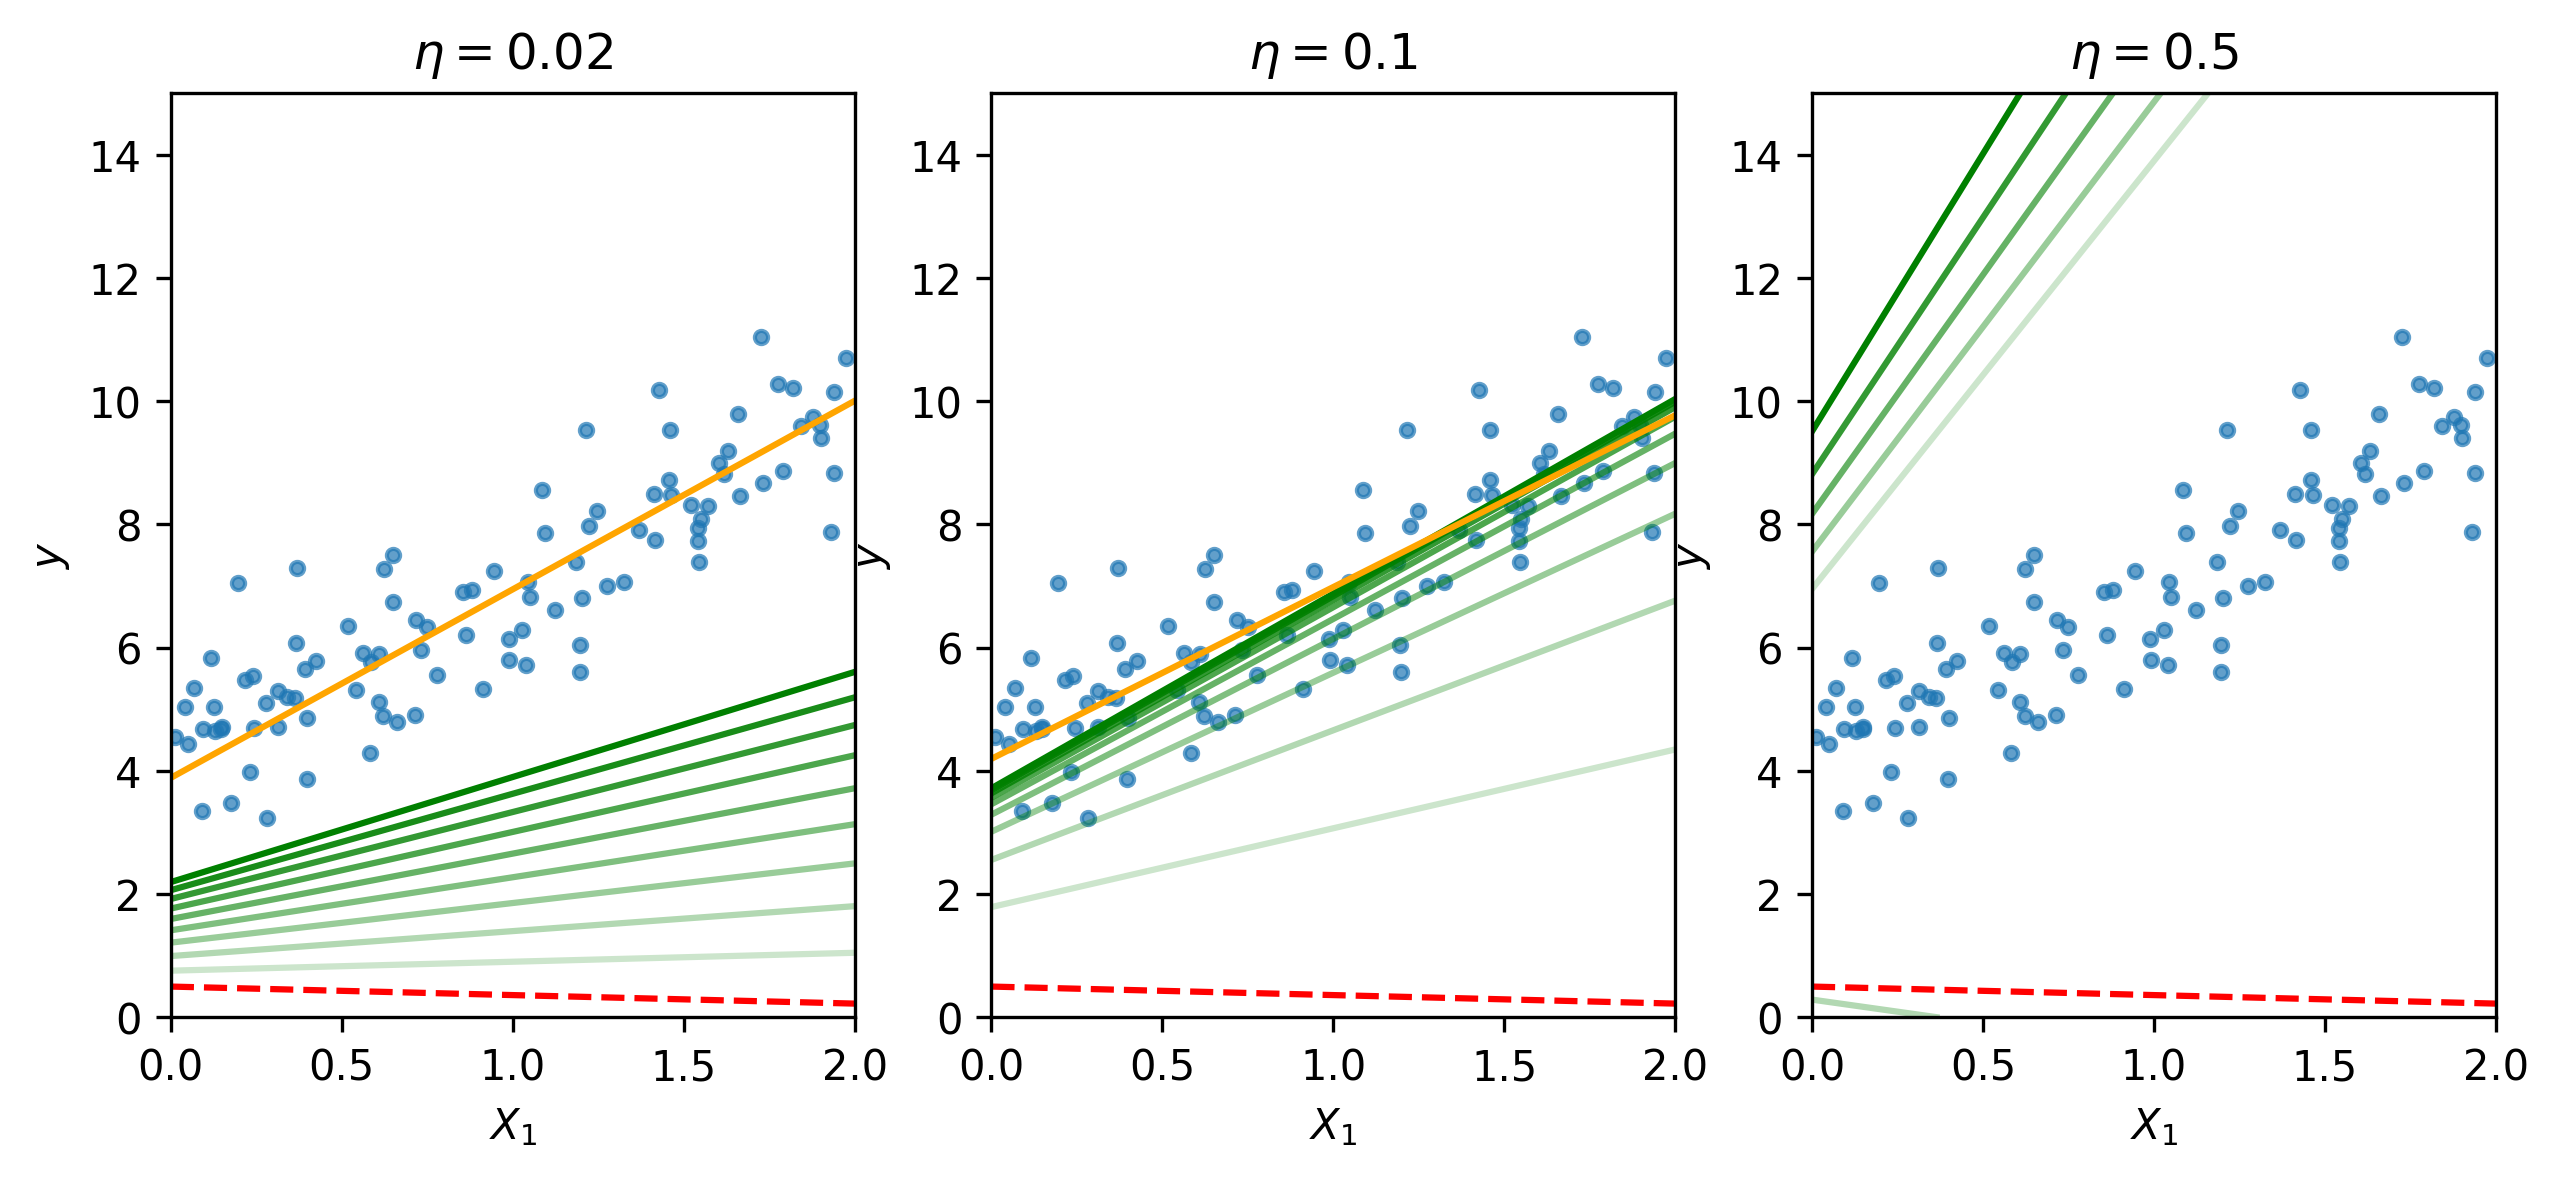

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(10,4))


# iterate over eta values and plot for each eta
for i, eta in enumerate([0.02, 0.1, 0.5]):
  plt.subplot(1, 3, i+1)
  plot_gradient_descent(theta, eta=eta)
plt.show()

## Stocastic Gradient Descent (SGD)
1. The gradient is calculated at a point chosen randomly (hence the name)
2. Update for each data point (of m data points) for each epoch (n_epoch)
3. Since the gradient is calculated only for one point at a time, computational cost is lower than BGD. But, now you are doing an update for n_epoch x m times.
4. The optimization process is jittery because of the stochastic nature.
Pros: Useful to move out of a local minima.
Cons: May never settle at the minimum. Use a "scheduler" to reduce the learning rate slowly so that near the minimum it settles slowly.

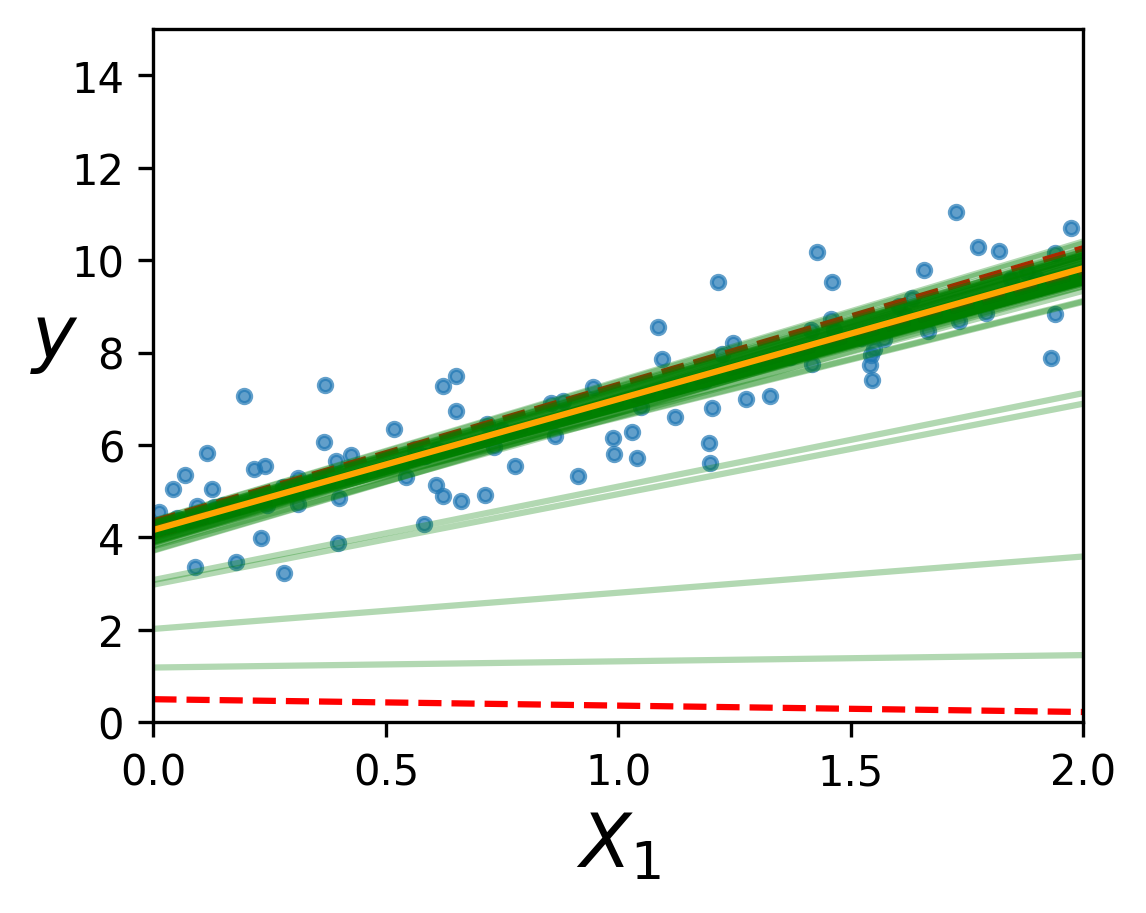

In [20]:
n_epochs = 5
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization


theta_path_sgd = [] # to store theta values for each step
m = len(X) # number of observations or data points


for epoch in range(n_epochs):
    for i in range(m):
      # the plot is shown only for the first 10 iterations
      if (i == 0 & epoch==0):
        color, linestyle, alpha = 'red', '--', 1.0
      elif (i < m-1):
        color, linestyle = 'green', '-'
        alpha = 0.3 #((i+1) / m)
      elif ((epoch == n_epochs-1) and (i == m-1)):
        color, linestyle = 'orange', '-'
        alpha = 1.0
      if ((int(i/20)==0) or (i==m-1) or (epoch == n_epochs)):
        # dashed line when iteration = 0, blue otherwise
        plt.axline(xy1=(0.0, theta[0,0]),
                  slope=theta[1,0],
                  color=color,
                  linestyle=linestyle,
                  alpha=alpha) # plot based on intercept and slope
      random_index = np.random.randint(m)
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
      eta = learning_schedule(epoch * m + i)
      theta -= eta * gradient
      theta_path_sgd.append(theta)

plt.scatter(X_1, y, s=10, alpha=0.7)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()



### Tasks
1. Try varying number of epochs and record your observations
2. How does stocastic gradient method help in minimizing the loss/cost function in linear regression?

## Mini-Batch Gradient Descent
To reduce the erratic behaviour of stochastic gradient descent, due to so many gradient updates, we strike a balance between batch and stochastic gradient descent:

1. calculate gradients on small random batches
2. update m/batch_size number of times in each epoch

Todo:
1. Increase n_epoch to 50 and plot the theta values vs. epoch.
2. How do the plots for stochastic and mini-batch gradient descent compare?

In [21]:
# code here

# Linear regression using scikit-learn

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics
from sklearn.metrics import (r2_score as r2,
                            mean_squared_error as mse,
                            mean_absolute_error as mae,
                            root_mean_squared_error as rmse,
                            mean_absolute_percentage_error as mape)

In [24]:
# create a regressor object
regressor = LinearRegression(fit_intercept=False) #check for arguments in docs
regressor.fit(X, y)

regressor.coef_, regressor.intercept_

(array([[4.21509616, 2.77011339]]), 0.0)

In [25]:
# alternate way
regressor_w_intercept = LinearRegression()
regressor_w_intercept.fit(X_1, y)

regressor_w_intercept.coef_, regressor_w_intercept.intercept_

(array([[2.77011339]]), array([4.21509616]))

### Tasks
1. Use your test data to evaluate the sklearn's models using sklearn's metrics functions